In [1]:
import cv2 as cv
from matplotlib import pyplot as plt 
import numpy as np

# Scale Invariant Feature Transform (SIFT)

[Additional reading](https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html)

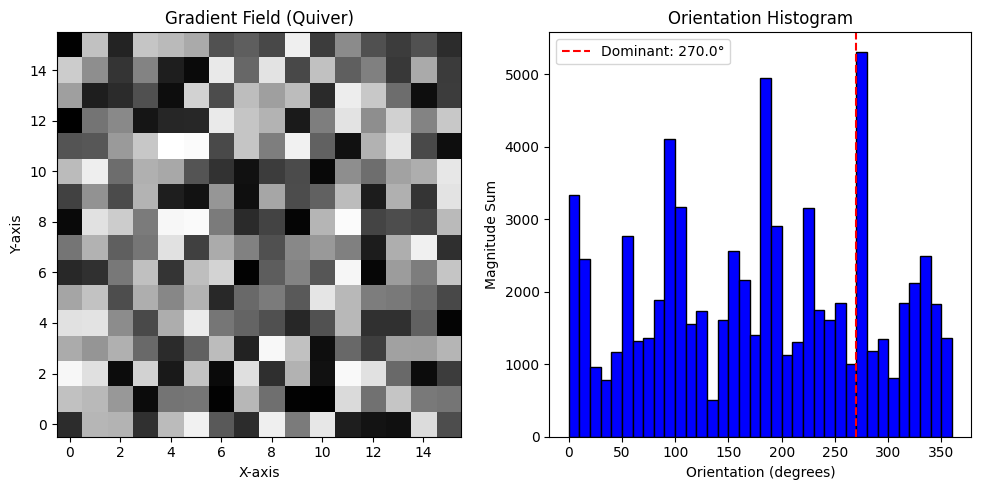

Dominant Orientation: 270.0 degrees


In [25]:
# How to find the orientation of a keypoint using SIFT (simplified)

# Generate a random 16x16 grayscale patch (for testing)
patch = np.random.randint(0, 256, (16, 16), dtype=np.uint8)

# Compute gradients using Sobel filters
dx = cv.Sobel(patch, cv.CV_64F, 1, 0, ksize=3)
dy = cv.Sobel(patch, cv.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude and orientation
magnitude = np.sqrt(dx**2 + dy**2)
orientation = np.arctan2(dy, dx) * (180 / np.pi)  # Convert radians to degrees

# Ensure orientation values are in range [0, 360)
orientation = (orientation + 360) % 360

# Display gradient field using quiver plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Gradient Field (Quiver)")
plt.imshow(patch, cmap='gray')
#plt.quiver(np.arange(16), np.arange(16), dx, -dy, angles='xy', color='r', scale = 4000)
plt.gca().invert_yaxis()  # Invert Y-axis for proper orientation
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Create an orientation histogram (36 bins, each covering 10°)
hist_bins = np.arange(0, 370, 10)  # Bins from 0° to 360°
hist, _ = np.histogram(orientation, bins=hist_bins, weights=magnitude)

# Find the dominant orientation
dominant_angle = hist_bins[np.argmax(hist)]

# Display orientation histogram
plt.subplot(1, 2, 2)
plt.title("Orientation Histogram")
plt.bar(hist_bins[:-1], hist, width=10, align='edge', color='blue', edgecolor='black')
plt.axvline(dominant_angle, color='red', linestyle='--', label=f'Dominant: {dominant_angle:.1f}°')
plt.xlabel("Orientation (degrees)")
plt.ylabel("Magnitude Sum")
plt.legend()

plt.tight_layout()
plt.show()

print(f"Dominant Orientation: {dominant_angle:.1f} degrees")

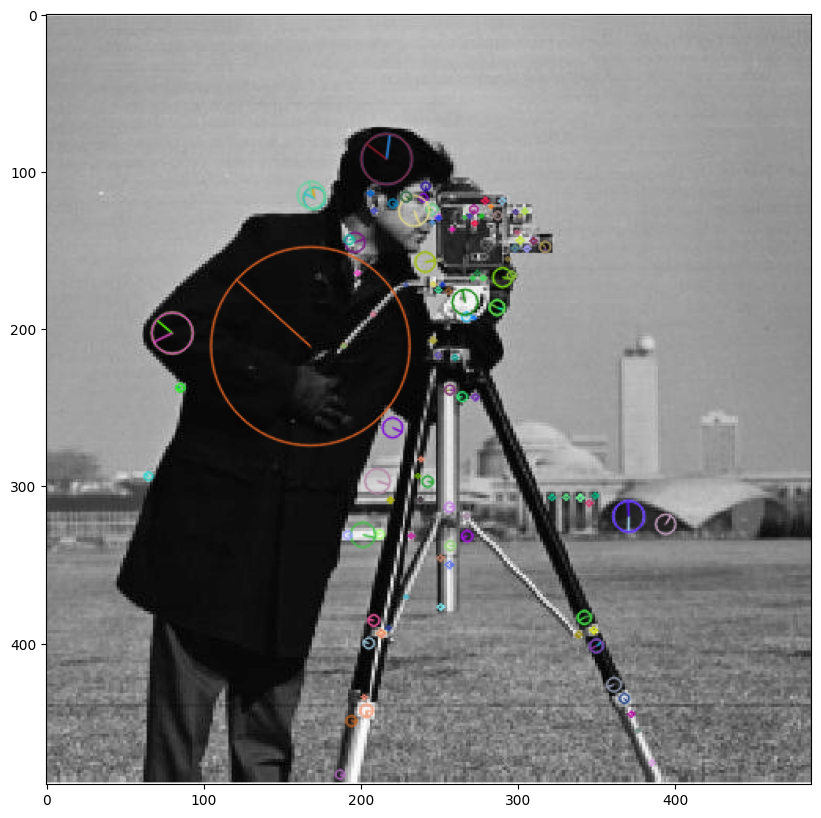

In [4]:
# Computing SIFT using opencv
image = cv.imread('data/images/cameraman.png', cv.IMREAD_GRAYSCALE)

sift = cv.SIFT_create(nfeatures = 150)
kp = sift.detect(image)
des = sift.compute(image, kp)
#kp, des = sift.detectAndCompute(image, None)

plt.figure(figsize = (10,10))
img = cv.drawKeypoints(image, kp, -1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

# Feature Matching

Given two vectors $ \mathbf{a} $ and $\mathbf{b_i}$ each of dimension (1x128), the Euclidean distance is defined as:

$$
d(\mathbf{a}, \mathbf{b}) = \sqrt{\sum_{j=1}^{128} (a_j - b_{j})^2}
$$

Where:
- $ \mathbf{a} = [a_1, a_2, \dots, a_{128}] $
- $ \mathbf{b} = [b_{1}, b_{2}, \dots, b_{128}] $

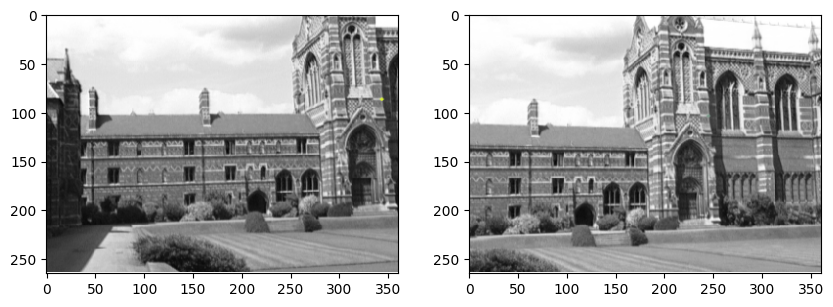

In [70]:
# Load images
image1 = cv.imread('data/images/keble.000.png', cv.IMREAD_GRAYSCALE) 
image2 = cv.imread('data/images/keble.003.png', cv.IMREAD_GRAYSCALE)

# Initialize SIFT detector
feat = cv.SIFT_create(nfeatures = 150)

# Find the keypoints and descriptors with ORB
keypoints1, descriptors1 = feat.detectAndCompute(image1, None)
keypoints2, descriptors2 = feat.detectAndCompute(image2, None)

# Compute the distance between the first keypoint in image and 1 and all the 
# keypoints of the second image and then find the keypoint which has the minimum distance

diff = descriptors1[50,:] - descriptors2
squared_diff = diff**2
distances = np.sqrt(np.sum(squared_diff, axis=1))
val = np.min(distances)
idx = np.argmin(distances)

plt.figure(figsize = (10,10))
img1 = cv.drawKeypoints(image1, [keypoints1[50]], -1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(121)
plt.imshow(img1)

img2 = cv.drawKeypoints(image2, [keypoints2[idx]], -1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(122)
plt.imshow(img2)

# SIFT Feature Matching

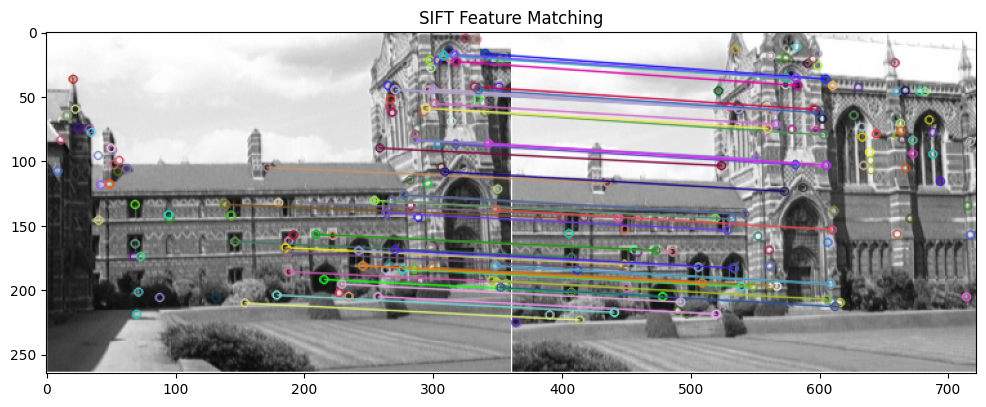

In [106]:
# Load images
#image1 = cv.imread('data/images/cartoon1.pgm', cv.IMREAD_GRAYSCALE)
#image2 = cv.imread('data/images/cartoon2.pgm', cv.IMREAD_GRAYSCALE)
image1 = cv.imread('data/images/keble.000.png', cv.IMREAD_GRAYSCALE)
image2 = cv.imread('data/images/keble.003.png', cv.IMREAD_GRAYSCALE)

# Initialize SIFT detector
feat = cv.SIFT_create(nfeatures = 150)

# Find the keypoints and descriptors with ORB
keypoints1, descriptors1 = feat.detectAndCompute(image1, None)
keypoints2, descriptors2 = feat.detectAndCompute(image2, None)

# Create BFMatcher (Brute Force Matcher)
bf = cv.BFMatcher()

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort them in ascending order of distance 
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
img_matches = cv.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], 
                              cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
                              

# Plot the matches using Matplotlib
plt.figure(figsize = (12,8))
plt.imshow(img_matches)
plt.title('SIFT Feature Matching')
plt.show()

## Example

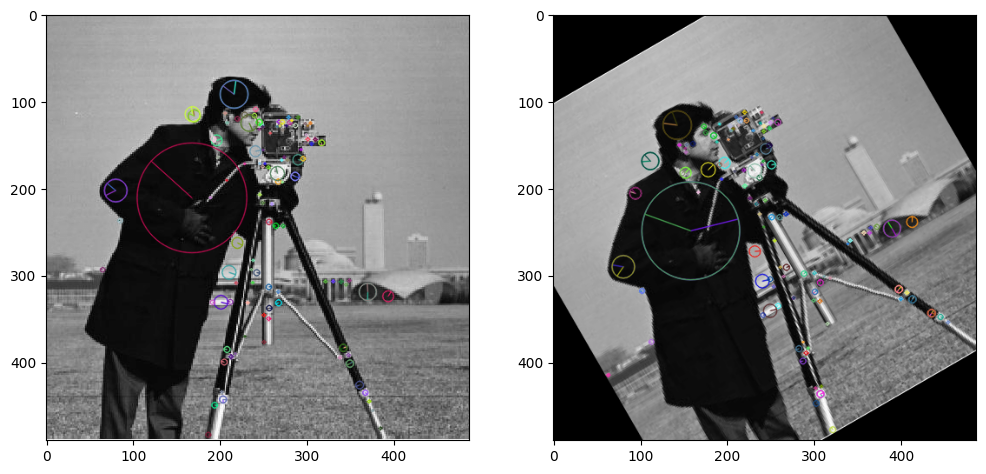

In [6]:
image = cv.imread('data/images/cameraman.png', cv.IMREAD_GRAYSCALE)

height, width = image.shape[:2]
rotation_matrix = cv.getRotationMatrix2D((width / 2, height / 2), 30, 1)
rotated_image = cv.warpAffine(image, rotation_matrix, (width, height))

sift = cv.SIFT_create(nfeatures = 150)
kp = sift.detect(image, None)
des = sift.compute(image, kp)

kp_, des_ = sift.detectAndCompute(rotated_image, None)

plt.figure(figsize = (12,8))
plt.subplot(121)
img = cv.drawKeypoints(image, kp, -1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

plt.subplot(122)
img = cv.drawKeypoints(rotated_image, kp_, -1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)